# Basketball Notebook

## An explanation for Koch

This is a jupyter notebook, a tool used by data scientists to display and explain their results. In order to run the code in a cell, just hit the play button on the left. Be careful though, because the order that you run the cells does matter, and if you run them out of order it might break an cause an error. Just run them all top to bottom to be safe.

In [1]:
%matplotlib inline

import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set_style("darkgrid")
sns.set_palette("pastel")

All I did here was import the necessary libraries for data analysis

## Load the Data

In [2]:
stats = pd.read_csv('IndividualStats.csv')

stats.head()

,Game,PTSPoints - Total points accrued by that player,FGThe number of field goals made - attempted by a player (the proportion of field goals attempted that were also made),2PThe number of two point field goals made - attempted (the proportion of two pointers attempted that were also made),3PThe number of three point field goals made - attempted (the proportion of three pointers attempted that were also made),FTThe number of free throws made - attempted (the proportion of free throws attempted that were also made),OROffensive Rebounds - The number of offensive rebounds collected by that player,DRDefensive Rebounds - The number of defensive rebounds collected by that player,TRTotal Rebounds - The total number of rebounds collected by that player,ASTAssists - The total number of assists credited to that player,STLSteals - The total number of steals by a player,BLKBlocks - This is the number of blocked shots by a player,TOTurnovers - The number of turnovers (not including offensive fouls),PFPersonal Fouls - This is the number of personal fouls accrued by that player,PFDPersonal Fouls Drawn - The number of personal fouls drawn by that player,TECHTechnical Fouls - The number of technical fouls accrued by that player,EFF,Player
0,vs. Homedale Nov 27,0,0 - 0 - 0%,0 - 0 - 0%,0 - 0 - 0%,0 - 0 - 0%,1,1,2,1,1,1,2,2,0,0,3,Caleb Renfrow
1,vs. Nyssa Nov 30,0,0 - 4 - 0%,0 - 3 - 0%,0 - 1 - 0%,0 - 0 - 0%,0,0,0,1,1,0,1,2,0,0,-3,Caleb Renfrow
2,at Homedale Dec 06,4,2 - 3 - 67%,2 - 3 - 67%,0 - 0 - 0%,0 - 0 - 0%,0,0,0,1,0,0,0,0,0,0,4,Caleb Renfrow
3,at Firth Dec 07,0,0 - 0 - 0%,0 - 0 - 0%,0 - 0 - 0%,0 - 0 - 0%,0,0,0,0,0,0,1,2,0,0,-1,Caleb Renfrow
4,at South Fremont Dec 08,0,0 - 1 - 0%,0 - 1 - 0%,0 - 0 - 0%,0 - 0 - 0%,0,0,0,0,0,0,1,0,0,0,-2,Caleb Renfrow


I imported the dataset and printed the first 5 rows. The data is pretty messy and is going to need cleaning, which is what I will continue to do in the following steps

## Cleaning

The first thing I want to do is change all the column names so working with the data won't be actually the worst.

In [3]:
rename_dict = {
    "PTSPoints - Total points accrued by that player": "PTS",
    "FGThe number of field goals made - attempted by a player (the proportion of field goals attempted that were also made)": "FG",
    "2PThe number of two point field goals made - attempted (the proportion of two pointers attempted that were also made)": "2PT",
    "3PThe number of three point field goals made - attempted (the proportion of three pointers attempted that were also made)": "3PT",
    "FTThe number of free throws made - attempted (the proportion of free throws attempted that were also made)": "FT",
    "OROffensive Rebounds - The number of offensive rebounds collected by that player": "OR",
    "DRDefensive Rebounds - The number of defensive rebounds collected by that player": "DR",
    "TRTotal Rebounds - The total number of rebounds collected by that player": "TR",
    "ASTAssists - The total number of assists credited to that player": "AST",
    "STLSteals - The total number of steals by a player": "STL", 
    "BLKBlocks - This is the number of blocked shots by a player": "BLK",
    "TOTurnovers - The number of turnovers (not including offensive fouls)": "TO",
    "PFPersonal Fouls - This is the number of personal fouls accrued by that player": "PF",
    "PFDPersonal Fouls Drawn - The number of personal fouls drawn by that player": "PFD",
    "TECHTechnical Fouls - The number of technical fouls accrued by that player": "TECH"
}

stats = stats.rename(columns=rename_dict)
stats

,Game,PTS,FG,2PT,3PT,FT,OR,DR,TR,AST,STL,BLK,TO,PF,PFD,TECH,EFF,Player
0,vs. Homedale Nov 27,0,0 - 0 - 0%,0 - 0 - 0%,0 - 0 - 0%,0 - 0 - 0%,1,1,2,1,1,1,2,2,0,0,3,Caleb Renfrow
1,vs. Nyssa Nov 30,0,0 - 4 - 0%,0 - 3 - 0%,0 - 1 - 0%,0 - 0 - 0%,0,0,0,1,1,0,1,2,0,0,-3,Caleb Renfrow
2,at Homedale Dec 06,4,2 - 3 - 67%,2 - 3 - 67%,0 - 0 - 0%,0 - 0 - 0%,0,0,0,1,0,0,0,0,0,0,4,Caleb Renfrow
3,at Firth Dec 07,0,0 - 0 - 0%,0 - 0 - 0%,0 - 0 - 0%,0 - 0 - 0%,0,0,0,0,0,0,1,2,0,0,-1,Caleb Renfrow
4,at South Fremont Dec 08,0,0 - 1 - 0%,0 - 1 - 0%,0 - 0 - 0%,0 - 0 - 0%,0,0,0,0,0,0,1,0,0,0,-2,Caleb Renfrow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,at Nampa Christian Feb 06,0,0 - 0 - 0%,0 - 0 - 0%,0 - 0 - 0%,0 - 0 - 0%,0,0,0,0,0,0,0,0,0,0,0,Tony Boyle
253,vs. Marsing Feb 08,0,0 - 0 - 0%,0 - 0 - 0%,0 - 0 - 0%,0 - 0 - 0%,0,0,0,0,0,0,0,0,0,0,0,Tony Boyle
254,vs. Melba Feb 18,0,0 - 0 - 0%,0 - 0 - 0%,0 - 0 - 0%,0 - 0 - 0%,0,0,0,0,0,0,0,0,0,0,0,Tony Boyle
255,at Marsing Feb 21,0,0 - 0 - 0%,0 - 0 - 0%,0 - 0 - 0%,0 - 0 - 0%,0,0,0,0,0,0,0,0,0,0,0,Tony Boyle


Now I can check the variable type of each column

In [4]:
stats.dtypes

Game      object
PTS        int64
FG        object
2PT       object
3PT       object
FT        object
OR         int64
DR         int64
TR         int64
AST        int64
STL        int64
BLK        int64
TO         int64
PF         int64
PFD        int64
TECH       int64
EFF        int64
Player    object
dtype: object

What I see in this is that for the most part the numeric fields are properly showing, with the exception of the Point columns which are formatted as strings. To remedy this, I will give each part of the string (Made shots, Attempted shots, and Proportion of makes) their own column

In [5]:
def clean_column(name):
    global stats

    if name in stats.columns:
        stats[name+"_made"] = stats[name].apply(lambda x: x.split(" - ")[0]).astype('int')
        stats[name+"_attempt"] = stats[name].apply(lambda x: x.split(" - ")[1]).astype('int')
        stats[name+"%"] = stats[name + "_made"] / stats[name+"_attempt"]
        stats[name+"%"] = stats[name+"%"].fillna(0)
        stats = stats.drop(name, axis=1)

clean_column("FG")
clean_column("2PT")
clean_column("3PT")
clean_column("FT")

stats

,Game,PTS,OR,DR,TR,AST,STL,BLK,TO,PF,...,FG%,2PT_made,2PT_attempt,2PT%,3PT_made,3PT_attempt,3PT%,FT_made,FT_attempt,FT%
0,vs. Homedale Nov 27,0,1,1,2,1,1,1,2,2,...,0.000000,0,0,0.000000,0,0,0.0,0,0,0.0
1,vs. Nyssa Nov 30,0,0,0,0,1,1,0,1,2,...,0.000000,0,3,0.000000,0,1,0.0,0,0,0.0
2,at Homedale Dec 06,4,0,0,0,1,0,0,0,0,...,0.666667,2,3,0.666667,0,0,0.0,0,0,0.0
3,at Firth Dec 07,0,0,0,0,0,0,0,1,2,...,0.000000,0,0,0.000000,0,0,0.0,0,0,0.0
4,at South Fremont Dec 08,0,0,0,0,0,0,0,1,0,...,0.000000,0,1,0.000000,0,0,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,at Nampa Christian Feb 06,0,0,0,0,0,0,0,0,0,...,0.000000,0,0,0.000000,0,0,0.0,0,0,0.0
253,vs. Marsing Feb 08,0,0,0,0,0,0,0,0,0,...,0.000000,0,0,0.000000,0,0,0.0,0,0,0.0
254,vs. Melba Feb 18,0,0,0,0,0,0,0,0,0,...,0.000000,0,0,0.000000,0,0,0.0,0,0,0.0
255,at Marsing Feb 21,0,0,0,0,0,0,0,0,0,...,0.000000,0,0,0.000000,0,0,0.0,0,0,0.0


I think I'm also going to add a date column, just in case I want a graph showing growth over time

In [6]:
def get_date(str):
    parts = str.split(" ")
    year = "2018" if parts[-2] in ["Nov", "Dec"] else "2019"
    date_str = parts[-2] + " " + parts[-1] + " " + year
    return datetime.strptime(date_str, "%b %d %Y")

stats["Date"] = stats["Game"].apply(get_date)
stats


,Game,PTS,OR,DR,TR,AST,STL,BLK,TO,PF,...,2PT_made,2PT_attempt,2PT%,3PT_made,3PT_attempt,3PT%,FT_made,FT_attempt,FT%,Date
0,vs. Homedale Nov 27,0,1,1,2,1,1,1,2,2,...,0,0,0.000000,0,0,0.0,0,0,0.0,2018-11-27
1,vs. Nyssa Nov 30,0,0,0,0,1,1,0,1,2,...,0,3,0.000000,0,1,0.0,0,0,0.0,2018-11-30
2,at Homedale Dec 06,4,0,0,0,1,0,0,0,0,...,2,3,0.666667,0,0,0.0,0,0,0.0,2018-12-06
3,at Firth Dec 07,0,0,0,0,0,0,0,1,2,...,0,0,0.000000,0,0,0.0,0,0,0.0,2018-12-07
4,at South Fremont Dec 08,0,0,0,0,0,0,0,1,0,...,0,1,0.000000,0,0,0.0,0,0,0.0,2018-12-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,at Nampa Christian Feb 06,0,0,0,0,0,0,0,0,0,...,0,0,0.000000,0,0,0.0,0,0,0.0,2019-02-06
253,vs. Marsing Feb 08,0,0,0,0,0,0,0,0,0,...,0,0,0.000000,0,0,0.0,0,0,0.0,2019-02-08
254,vs. Melba Feb 18,0,0,0,0,0,0,0,0,0,...,0,0,0.000000,0,0,0.0,0,0,0.0,2019-02-18
255,at Marsing Feb 21,0,0,0,0,0,0,0,0,0,...,0,0,0.000000,0,0,0.0,0,0,0.0,2019-02-21


Now the datatypes of every column should be correct, and there is no more cleaning to be done

In [7]:
stats.dtypes

Game                   object
PTS                     int64
OR                      int64
DR                      int64
TR                      int64
AST                     int64
STL                     int64
BLK                     int64
TO                      int64
PF                      int64
PFD                     int64
TECH                    int64
EFF                     int64
Player                 object
FG_made                 int64
FG_attempt              int64
FG%                   float64
2PT_made                int64
2PT_attempt             int64
2PT%                  float64
3PT_made                int64
3PT_attempt             int64
3PT%                  float64
FT_made                 int64
FT_attempt              int64
FT%                   float64
Date           datetime64[ns]
dtype: object

## Analysis

This is the fun part.
First, lets have a broad overview of our data.

In [8]:
stats.describe()

,PTS,OR,DR,TR,AST,STL,BLK,TO,PF,PFD,...,FG%,2PT_made,2PT_attempt,2PT%,3PT_made,3PT_attempt,3PT%,FT_made,FT_attempt,FT%
count,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,...,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000
mean,5.108949,1.050584,1.727626,2.778210,1.256809,0.883268,0.346304,1.291829,1.249027,1.019455,...,0.290435,1.552529,3.225681,0.312632,0.478599,1.451362,0.152892,0.568093,1.023346,0.187447
std,6.484040,1.466211,2.314133,3.271777,1.680600,1.244516,0.829578,1.387884,1.340566,1.353385,...,0.303535,2.098680,3.595196,0.343634,0.884176,2.047905,0.273643,1.095193,1.704612,0.324917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.250000,1.000000,2.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,2.000000,2.000000,4.000000,2.000000,1.000000,0.000000,2.000000,2.000000,2.000000,...,0.500000,2.000000,5.000000,0.571429,1.000000,2.000000,0.250000,1.000000,2.000000,0.333333
max,29.000000,8.000000,13.000000,16.000000,8.000000,7.000000,6.000000,7.000000,7.000000,6.000000,...,1.000000,9.000000,17.000000,1.000000,4.000000,9.000000,1.000000,6.000000,8.000000,1.000000


Text(0.5, 0, 'Free Throw %')

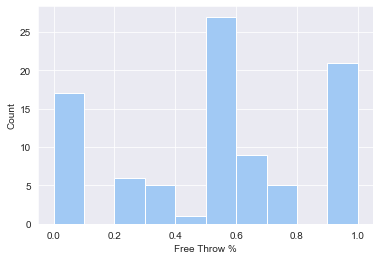

In [9]:
plt.hist(stats[stats["FT_attempt"] > 0]["FT%"])
plt.ylabel("Count")
plt.xlabel("Free Throw %")

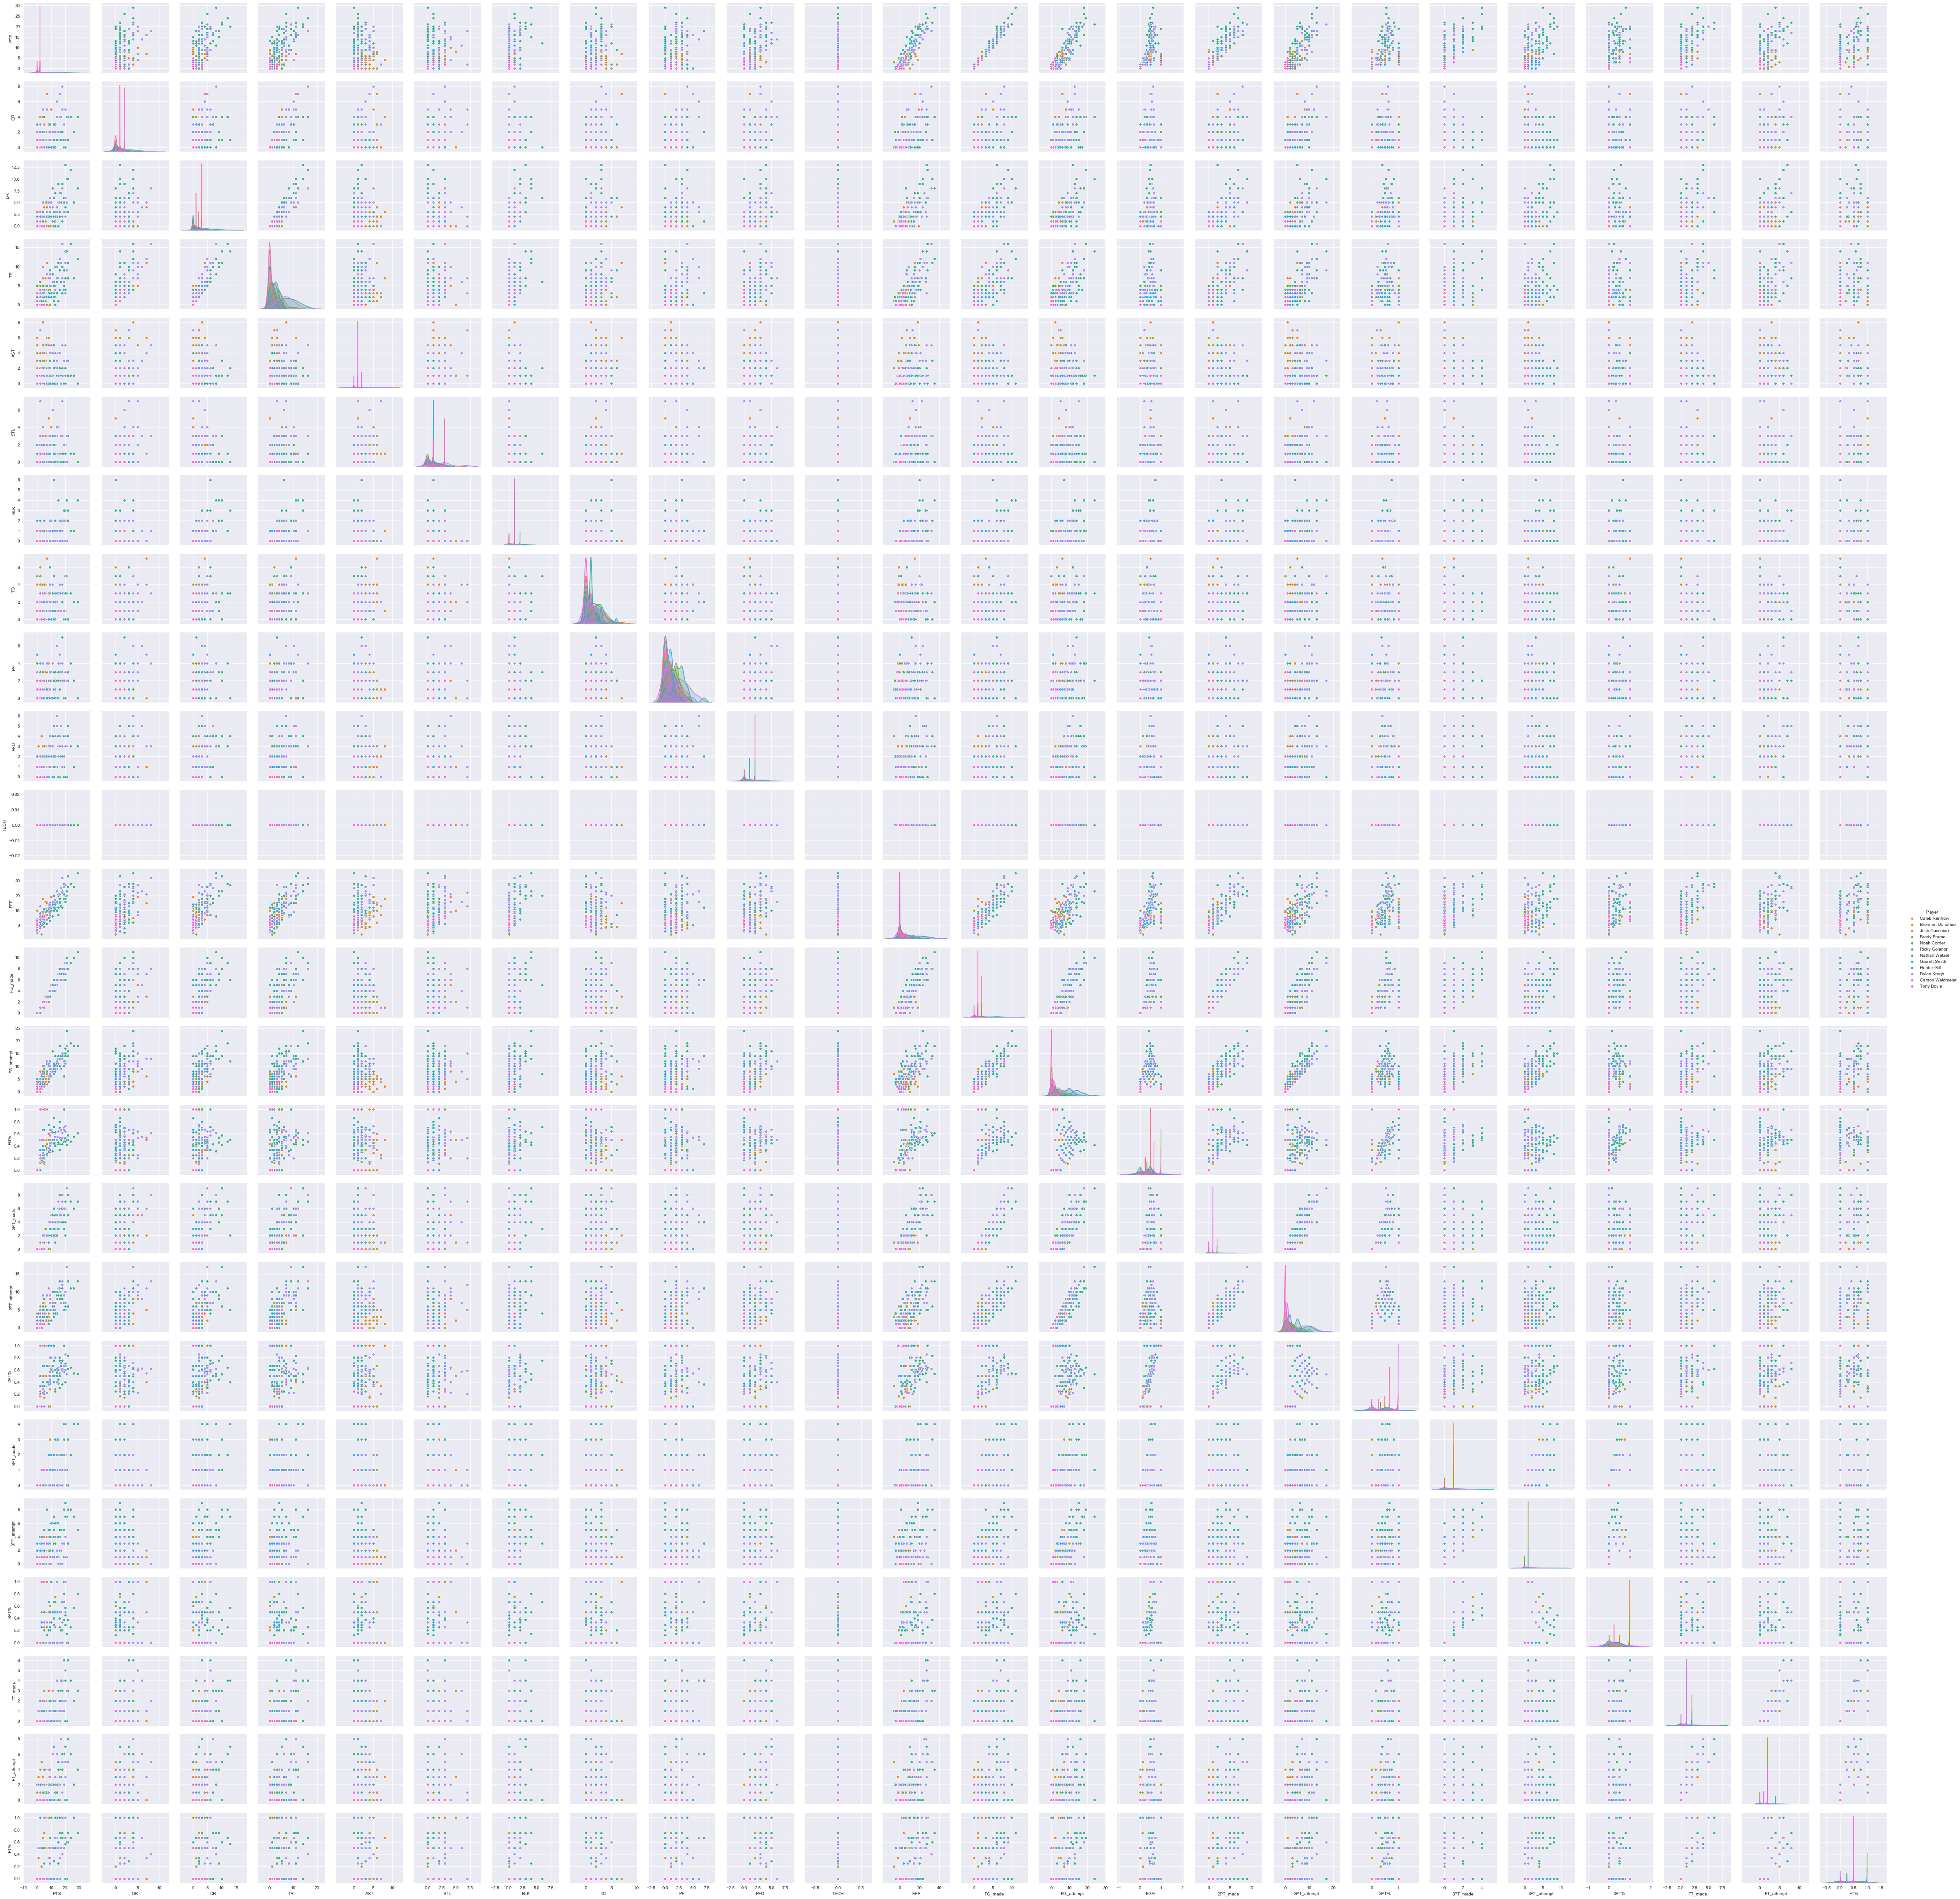

In [19]:
# I already ran this, it took an insanely long time but yielded good results, instead I'll display the png
# plot = sns.pairplot(stats.dropna(), hue="Player")
# plot.savefig("output.png", facecolor="white")

from IPython.display import Image
Image(filename='output.png')

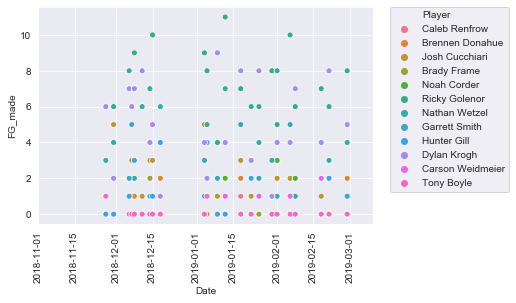

In [20]:
plot = sns.scatterplot(x=stats["Date"], y=stats["FG_made"], hue=stats["Player"])
plot.axes.set_xlim(datetime.strptime("01-11-2018", "%d-%m-%Y"), datetime.strptime("10-03-2019", "%d-%m-%Y"))
plt.xticks(rotation='vertical')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

(array([736999., 737013., 737029., 737043., 737060., 737074., 737091.,
        737105., 737119.]), <a list of 9 Text xticklabel objects>)

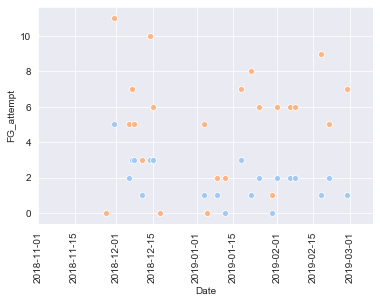

In [12]:
plot = sns.scatterplot(stats[stats["Player"] == "Josh Cucchiari"]["Date"], stats[stats["Player"] == "Josh Cucchiari"]["FG_made"])
sns.scatterplot(stats[stats["Player"] == "Josh Cucchiari"]["Date"], stats[stats["Player"] == "Josh Cucchiari"]["FG_attempt"])
plot.axes.set_xlim(datetime.strptime("01-11-2018", "%d-%m-%Y"), datetime.strptime("10-03-2019", "%d-%m-%Y"))
plt.xticks(rotation='vertical')


In [13]:
filter = (stats["3PT_attempt"] > 0) & (stats["Player"] == "Josh Cucchiari")
stats[filter]["3PT%"].mean()

0.2733333333333333

In [15]:
filter = (stats["FG_attempt"] > 0) & (stats["Player"] == "Ricky Golenor")
stats[filter]["FG%"].mean()

0.5306228294565615

Just for reference, I am going to create a list of players so that I can effectively loop through them and run stats on all of them

In [16]:
players = stats["Player"].unique()
player

array(['Caleb Renfrow', 'Brennen Donahue', 'Josh Cucchiari',
       'Brady Frame', 'Noah Corder', 'Ricky Golenor', 'Nathan Wetzel',
       'Garrett Smith', 'Hunter Gill', 'Dylan Krogh', 'Carson Weidmeier',
       'Tony Boyle'], dtype=object)

So for instance, if I wanted to check the relative efficiency of giving a player the ball, I would do something like this:

In [18]:
efficiency = {}

for player in players:
    stats_player = stats[stats["Player"] == player]

    p_2PT = stats_player["2PT_attempt"].mean() / stats_player["FG_attempt"].mean()
    p_3PT = 1 - p_2PT

    p_2PT_made = stats_player["2PT%"].mean()
    p_3PT_made = stats_player["3PT%"].mean()

    player_efficiency = 3 * p_3PT * p_3PT_made + 2 * p_2PT * p_2PT_made
    efficiency[player] = player_efficiency

efficiency

{'Caleb Renfrow': 0.17512077294685988,
 'Brennen Donahue': 0.8356414385399894,
 'Josh Cucchiari': 0.6551839464882943,
 'Brady Frame': 0.16131907308377896,
 'Noah Corder': 0.5652173913043478,
 'Ricky Golenor': 1.1801284277220105,
 'Nathan Wetzel': 1.0857560649527893,
 'Garrett Smith': 0.2728900255754475,
 'Hunter Gill': 0.6195652173913043,
 'Dylan Krogh': 0.9764411110827829,
 'Carson Weidmeier': 0.6222222222222222,
 'Tony Boyle': 0.13157894736842105}